# Integral Transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

The last application of integrals that we discuss in this chapter is integral transforms.
An integral transform is a procedure that takes a function as input and outputs
another function. Integral transforms are the most useful when they can be computed
symbolically, and here we explore two examples of integral transforms that can be
performed using SymPy: the **Laplace transform** and the **Fourier transform**. There are
numerous applications of these two transformations, but the fundamental motivation
is to transform problems into a form that is more easily handled. 

It can, for example, be a transformation of a differential equation into an algebraic equation, using Laplace
transforms, or a transformation of a problem from the time domain to the frequency
domain, using Fourier transforms.
In general, an integral transform of a function $f(t)$ can be written as

$$
T_f(u) = \int_{t_1}^{t_2} K(t,u) f(t) dt
$$

where $T_f(u)$ is the transformed function. The choice of the kernel $K(t, u)$ and the
integration limits determine the type of integral transform. The inverse of the integral
transform is given by

$$
f(u)=\int_{u_1}^{u_2} K^{-1} (u, t) T_f(u) du
$$

where $K^{−1}(u, t)$ is the kernel of the inverse transform. SymPy provides functions for
several types of integral transform, but here we focus on the Laplace transform

$$
L_f(s) = \int_{0}^{\infty} e^{-st} f(t) dt
$$

With the inverse transform (based on [wikipedia](https://en.wikipedia.org/wiki/Laplace_transform#Inverse_Laplace_transform))

$$
f(t) = \frac{1}{2 \pi i} \lim_{T \to \infty} \int_{c - iT}^{c + iT} e^{st} L_f(s) ds
$$

and the Fourier transform

$$
F_f(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} e^{-i \omega t} f(t) dt
$$

with the inverse transform

$$
f(t) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} e^{i \omega t} F_f(\omega) d\omega
$$

With SymPy, we can perform these transforms with the `sympy.laplace_transform`
and `sympy.fourier_transform`, respectively, and the corresponding inverse transforms
can be computed with the `sympy.inverse_laplace_transform` and `sympy.inverse_fourier_transform`.

These functions take a SymPy expression for the function to
transform as first argument, and the symbol for independent variable of the expression
to transform as second argument (e.g., `t`), and as third argument they take the symbol
for the transformation variable (e.g., `s`). For example, to compute the Laplace transform
of the function $f(t) = \sin{at}$, we begin by defining SymPy symbols for the variables `a, t, s` and a SymPy expression for the function $f(t)$:

In [3]:
s = sympy.symbols("s")
a, t = sympy.symbols("a, t", positive=True)
f = sympy.sin(a*t)

f

> Once we have SymPy objects for the variables and the function, we can call the
`laplace_transform` function to compute the Laplace transform

In [4]:
# You can see the result!
sympy.laplace_transform(f, t, s)

By default, the laplace_transform function returns a tuple containing the resulting
transform; the value `A` from convergence condition of the transform, which takes the
form $A < Rs$ ; and lastly additional conditions that are required for the transform to be
well defined. These conditions typically depend on the constraints that are specified
when symbols are created. For example, here we used `positive=True` when creating the
symbols `a` and `t`, to indicate that they represent real and positive numbers. Often we are
only interested in the transform itself, and we can then use the `noconds=True` keyword
argument to suppress the conditions in the return result

In [5]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

The inverse transformation can be used in a similar manner, except that we need to
reverse the roles of the symbols `s` and `t`. The Laplace transform is a unique one-to-one
mapping, so if we compute the inverse Laplace transform of the previously computed
Laplace transform, we expect to recover the original function

In [7]:
# Restore the original function
sympy.inverse_laplace_transform(F, s, t)

SymPy can compute the transforms for many elementary mathematical functions
and for a wide variety of combinations of such functions. When solving problems
using Laplace transformations by hand, one typically searches for matching functions
in reference tables with known Laplace transformations. Using SymPy, this process
can conveniently be automated in many, but not all, cases. The following examples
show a few additional examples of well-known functions that one finds in Laplace
transformation tables. Polynomials have simple Laplace transformation

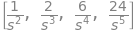

In [8]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

and we can also compute the general result with an arbitrary integer exponent:

In [9]:
n = sympy.symbols("n", integer=True, positive=True)

sympy.laplace_transform(t**n, t, s, noconds=True)

The Laplace transform of composite expressions can also be computed, as in the
following example which computes the transform of the function $f(t) = (1 − at)e^{−at}$

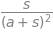

In [10]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

The main application of Laplace transforms is to solve differential equations,
where the transformation can be used to bring the differential equation into a purely
algebraic form, which can then be solved and transformed back to the original domain
by applying the inverse Laplace transform.

Fourier transforms can also be used for the same purpose.
The Fourier transform function, `fourier_tranform`, and its inverse, `inverse_fourier_transform`, are used in much the same way as the Laplace transformation functions. For example, to compute the Fourier transform of $f(t) = e^{-at^2}$ , we would first
define SymPy symbols for the variables `a`, `t`, and `ω`, and the function $f(t)$, and then
compute the Fourier transform by calling the `sympy.fourier_transform` function:

In [13]:
a, t, w = sympy.symbols("a, t, omega")
f = sympy.exp(-a*t**2)

F = sympy.fourier_transform(f, t, w, noconds=True)
F

Transform back with the inverse

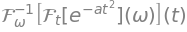

In [14]:
sympy.inverse_fourier_transform(F, w, t)

Something strange here...